# Health Insurance Cost Prediction

Overview:

Everyone knows health insurance is crucial, but did you know several factors can affect its cost?
In this project, I explore how various attributes influence health insurance premiums and predict costs using regression models.

Dataset Highlights:

Age: Age of the primary beneficiary.

Sex: Gender of the insurance contractor (male or female).

BMI: Body Mass Index - a key indicator of body health with an ideal range of 18.5 to 24.9.

Children: Number of kids/dependents covered by health insurance.

Smoker: Indicates whether the beneficiary smokes.

Region: Residential area in the US (northeast, southeast, southwest, northwest).

Approach:

Visualization: Graphical representation of data to highlight trends and patterns.

Regression Modeling: Multiple regression techniques are applied to predict insurance costs, enabling comparison and performance evaluation.

Dive into the code and notebooks to get a detailed perspective on health insurance cost influencers and see how different regression models fare in predicting them!








# Import libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.dummy import DummyRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Data Preprocessing

In [2]:
df = pd.read_csv('insurance.csv')

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.shape

(1338, 7)

In [5]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [6]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
duplicated_rows = df[df.duplicated()]
print(f"Duplicated Rows:\n{duplicated_rows}")

Duplicated Rows:
     age   sex    bmi  children smoker     region    charges
581   19  male  30.59         0     no  northwest  1639.5631


In [8]:
df= df.drop_duplicates()
df.shape

(1337, 7)

# Visualization

/Users/mohsen/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


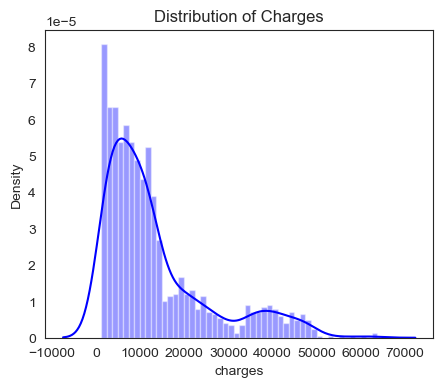

In [9]:
sns.set_style("white")
f, ax = plt.subplots(1, 1, figsize=(5, 4))
sns.distplot(df['charges'], kde=True, bins=50, color = 'b')
plt.title('Distribution of Charges')
plt.show()

/Users/mohsen/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


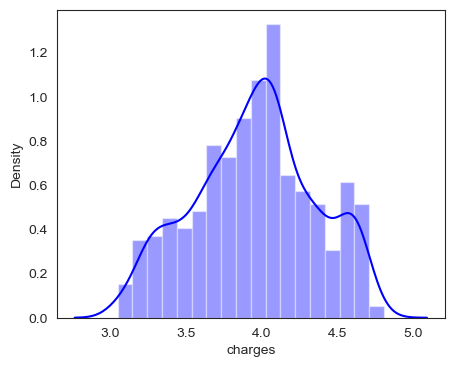

In [10]:
f, ax = plt.subplots(1, 1, figsize=(5, 4))
ax = sns.distplot(np.log10(df['charges']), kde = True, color = 'b' )

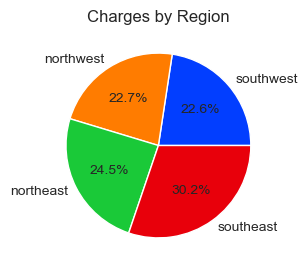

In [11]:
charges = df['charges'].groupby(df.region).sum().sort_values(ascending = True)
plt.figure(figsize=(3, 3))
colors = sns.color_palette("bright", n_colors=len(charges))
plt.pie(charges, labels=charges.index, colors=colors, autopct='%1.1f%%')
plt.title("Charges by Region")
plt.show()

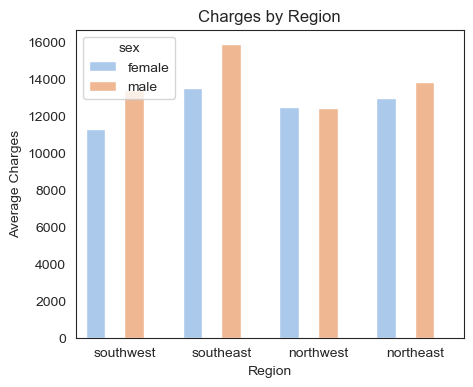

In [12]:
plt.figure(figsize=(5, 4))
dodge_value = 0.1
sns.barplot(x='region', y='charges', hue='sex', data=df, ci=None, palette='pastel', dodge = dodge_value)

for bar in plt.gca().patches:
    bar.set_width(0.2) 
    
plt.title('Charges by Region')
plt.ylabel('Average Charges')
plt.xlabel('Region')
plt.show()

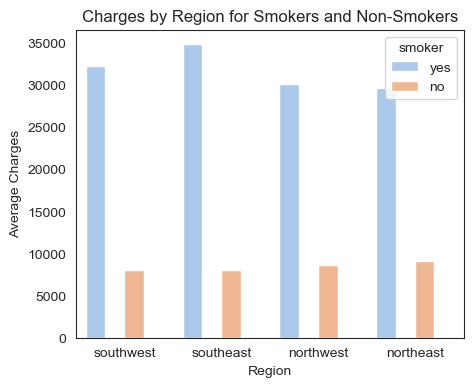

In [13]:
plt.figure(figsize=(5, 4))
dodge_value = 0.1
sns.barplot(x='region', y='charges', hue='smoker', data=df, ci=None, palette='pastel', dodge = dodge_value)

for bar in plt.gca().patches:
    bar.set_width(0.2)
    
plt.title('Charges by Region for Smokers and Non-Smokers')
plt.ylabel('Average Charges')
plt.xlabel('Region')
plt.show()

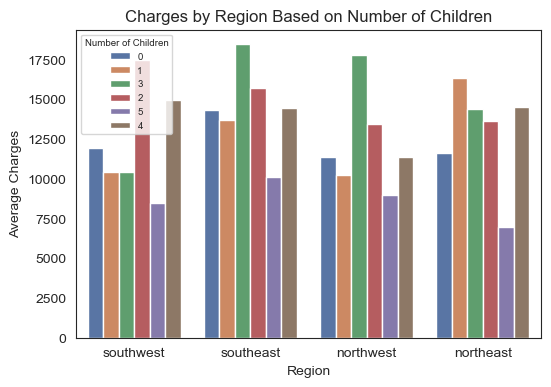

In [14]:
df['children'] = df['children'].astype(str)

plt.figure(figsize=(6, 4))
sns.barplot(x='region', y='charges', hue='children', data=df, ci=None, palette='deep')
plt.title('Charges by Region Based on Number of Children')
plt.ylabel('Average Charges')
plt.xlabel('Region')
plt.legend(title='Number of Children', title_fontsize='x-small', fontsize='x-small')
plt.show()

In [15]:
df = pd.get_dummies(df, columns=['sex', 'smoker', 'region'], drop_first=True)

# Checking the availablity of outliers

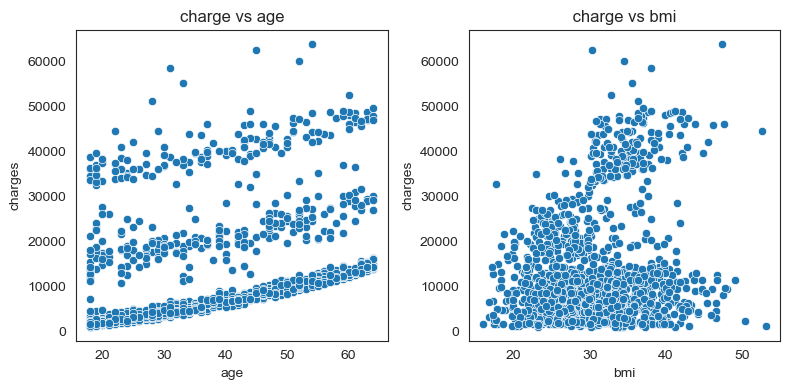

In [16]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8,4))

sns.scatterplot(data=df, x='age', y='charges', ax=ax1)
ax1.set_title("charge vs age")

sns.scatterplot(data=df, x='bmi', y='charges', ax=ax2)
ax2.set_title(" charge vs bmi ")

plt.tight_layout()
plt.show()

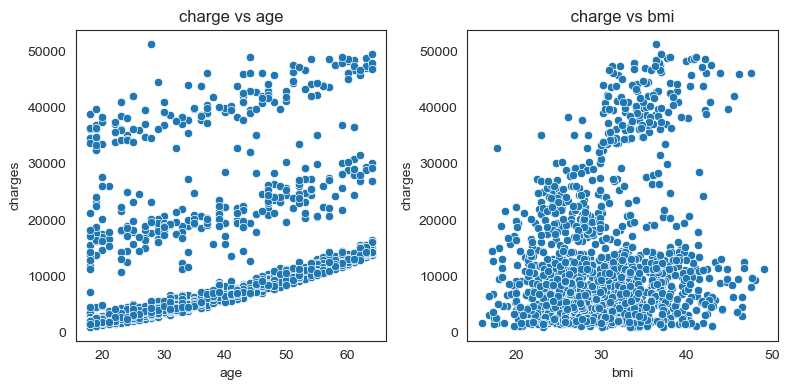

In [17]:
filtered_dataset = df[(df['charges'] <= 52000) & (df['bmi'] <= 50)]
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8,4))

sns.scatterplot(data=filtered_dataset, x='age', y='charges', ax=ax1)
ax1.set_title("charge vs age")

sns.scatterplot(data=filtered_dataset, x='bmi', y='charges', ax=ax2)
ax2.set_title(" charge vs bmi ")

plt.tight_layout()
plt.show()

# Dummy Regression 

In [18]:
X = df.drop(['charges'], axis=1)
y = df['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
dummy = DummyRegressor(strategy='mean')
dummy.fit(X_train, y_train)

DummyRegressor()

In [20]:
dummy_predictions = dummy.predict(X_test)

mae = mean_absolute_error(y_test, dummy_predictions)
mse = mean_squared_error(y_test, dummy_predictions)
r2 = r2_score(y_test, dummy_predictions)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared: {r2:.2f}")

Mean Absolute Error (MAE): 9861.80
Mean Squared Error (MSE): 185298141.69
R-squared: -0.01


# Decision Tree

In [21]:
param_grid = {
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


tree = DecisionTreeRegressor(random_state=42)
grid_search = GridSearchCV(tree, param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True, verbose=1)
grid_search.fit(X_train, y_train)
print("Best hyperparameters:", grid_search.best_params_)

best_tree = grid_search.best_estimator_
cv_mse = -grid_search.best_score_
print("Cross-validated Mean Squared Error:", cv_mse)

Fitting 5 folds for each of 45 candidates, totalling 225 fits
Best hyperparameters: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 10}
Cross-validated Mean Squared Error: 23385860.594706852


# Random Forest

In [22]:
param_grid = {
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}


rf = RandomForestRegressor(n_estimators=100, random_state=42)
grid_search_rf = GridSearchCV(rf, param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True, verbose=1)
grid_search_rf.fit(X_train, y_train)
print("Best hyperparameters for Random Forest:", grid_search_rf.best_params_)

best_rf = grid_search_rf.best_estimator_
cv_mse_rf = -grid_search_rf.best_score_
print("Cross-validated Mean Squared Error for Random Forest:", cv_mse_rf)

Fitting 5 folds for each of 90 candidates, totalling 450 fits
Best hyperparameters for Random Forest: {'bootstrap': True, 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 10}
Cross-validated Mean Squared Error for Random Forest: 21556920.26639418


# Gradient Boosting

In [23]:
param_grid_gb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.05, 0.1, 0.5],
    'max_depth': [3, 4, 5, 6],
    'subsample': [0.8, 0.9, 1.0],
    'max_features': [None, 'sqrt', 'log2']
}


gb = GradientBoostingRegressor(random_state=42)
grid_search_gb = GridSearchCV(gb, param_grid_gb, cv=5, scoring='neg_mean_squared_error', return_train_score=True, verbose=1)
grid_search_gb.fit(X_train, y_train)

print("Best hyperparameters for Gradient Boosting:", grid_search_gb.best_params_)
best_gb = grid_search_gb.best_estimator_
cv_mse_gb = -grid_search_gb.best_score_
print("Cross-validated Mean Squared Error for Gradient Boosting:", cv_mse_gb)

Fitting 5 folds for each of 432 candidates, totalling 2160 fits
Best hyperparameters for Gradient Boosting: {'learning_rate': 0.05, 'max_depth': 3, 'max_features': None, 'n_estimators': 100, 'subsample': 0.8}
Cross-validated Mean Squared Error for Gradient Boosting: 21439550.81333145


# Evaluating the performance of the gradient boosting algorithm

In [24]:
gb_predictions = best_gb.predict(X_test)

test_mae = mean_absolute_error(y_test, gb_predictions)
test_mse = mean_squared_error(y_test, gb_predictions)
test_r2 = r2_score(y_test, gb_predictions)

print(f"Test MAE: {test_mae:.2f}")
print(f"Test MSE: {test_mse:.2f}")
print(f"Test R^2: {test_r2:.2f}")

Test MAE: 2491.14
Test MSE: 17891925.93
Test R^2: 0.90


# Comparing the actual vs. predicted values

In [25]:
results_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': gb_predictions,
    'Difference': y_test - gb_predictions
})

In [26]:
print(results_df.head(50))

           Actual     Predicted    Difference
900    8688.85885  10562.044385  -1873.185535
1064   5708.86700   7967.671853  -2258.804853
1256  11436.73815  12553.355112  -1116.616962
298   38746.35510  39143.916855   -397.561755
237    4463.20510   6566.024135  -2102.819035
481    9304.70190  11777.075321  -2472.373421
240   38511.62830  38605.584250    -93.955950
277    2150.46900   3109.545009   -959.076009
415    7345.72660   9165.302306  -1819.575706
707   10264.44210  11450.794337  -1186.352237
370   13415.03810  14215.336320   -800.298220
331   24393.62240  24878.103870   -484.481470
1249  37607.52770  39143.916855  -1536.389155
895   13063.88300  14375.937243  -1312.054243
637   24915.04626   8958.908113  15956.138147
497    8027.96800   9027.809036   -999.841036
210    1980.07000   3928.212313  -1948.142313
49    38709.17600  39419.973576   -710.797576
737    3484.33100   6419.919603  -2935.588603
76     3947.41310   5768.078534  -1820.665434
614    1880.07000   3874.010272  -